## This Notebook gives performs Data Splitting and Resizing of Images (to load in Google Drive - Colab)

#  <font color='red'>Table of Contents</font>

[6. Train Validation Split](#section6)<br>
[7. Resize and save](#section7)<br>
[8. Image Pre Processing and save](#section8)<br>

In [ ]:
#ref - https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

# Basic Libs..
import multiprocessing
from multiprocessing.pool import ThreadPool
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from tqdm import tqdm,tqdm_notebook
from prettytable import PrettyTable
import pickle
import os
print('CWD is ',os.getcwd())

# Vis Libs..
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["axes.grid"] = False

# Image Libs.
from PIL import Image
import cv2

# sklearn libs..
from sklearn.model_selection import train_test_split

# DL Libs..
import keras
from keras import applications
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

: 

#  <a id = 'section6'> <font color='red'>  6. Train Validation Split</font> </a>

In [36]:
def load_data():
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')
        
    train_dir = os.path.join('./','train_images/')
    test_dir = os.path.join('./','test_images/')
        
    train['file_path'] = train['id_code'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
    test['file_path'] = test['id_code'].map(lambda x: os.path.join(test_dir,'{}.png'.format(x)))
        
    train['file_name'] = train["id_code"].apply(lambda x: x + ".png")
    test['file_name'] = test["id_code"].apply(lambda x: x + ".png")
        
    train['diagnosis'] = train['diagnosis'].astype(str)
        
    return train,test

In [99]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Function to create a DataFrame from a folder
def create_dataframe_from_folder(folder_path):
    data = []

    # Iterate through each class folder
    for class_folder in os.listdir(folder_path):
        class_path = os.path.join(folder_path, class_folder)

        # Iterate through each image in the class folder
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)

            # Append the class label and image path to the data list
            data.append({'Class': class_folder, 'Image_Path': image_path})

    # Create a DataFrame from the data list
    df = pd.DataFrame(data)
    return df

# Example usage
data_folder = "C:\\Users\\giri2\\OneDrive\\Desktop\\diabetic retinopathy\\train_images"
dataset_df = create_dataframe_from_folder(data_folder)

# Split the DataFrame into training and validation sets
train_df, val_df = train_test_split(dataset_df, test_size=0.2, random_state=42)

# Display the DataFrames
print("Training DataFrame:")
print(train_df.head())

print("\nValidation DataFrame:")
print(val_df.head())


NotADirectoryError: [WinError 267] The directory name is invalid: 'C:\\Users\\giri2\\OneDrive\\Desktop\\diabetic retinopathy\\train_images\\000c1434d8d7.png'

In [93]:
df_train,df_test = load_data()
print(df_train.shape,df_test.shape,'\n')
df_train.head(6)
df_test.head(6)

(3662, 4) (1928, 3) 



,id_code,file_path,file_name
0,0005cfc8afb6,./test_images/0005cfc8afb6.png,0005cfc8afb6.png
1,003f0afdcd15,./test_images/003f0afdcd15.png,003f0afdcd15.png
2,006efc72b638,./test_images/006efc72b638.png,006efc72b638.png
3,00836aaacf06,./test_images/00836aaacf06.png,00836aaacf06.png
4,009245722fa4,./test_images/009245722fa4.png,009245722fa4.png
5,009c019a7309,./test_images/009c019a7309.png,009c019a7309.png


In [106]:
df_train_train,df_train_valid = train_test_split(df_train,test_size = 0.2)
print(df_train_train.shape,df_train_valid.shape)

(2929, 4) (733, 4)


In [107]:
'''This Function Plots a Bar plot of output Classes Distribution'''

def plot_classes(df,title):
    df_group = pd.DataFrame(df.groupby('diagnosis').agg('size').reset_index())
    df_group.columns = ['diagnosis','count']

    sns.set(rc={'figure.figsize':(10,5)}, style = 'whitegrid')
    sns.barplot(x = 'diagnosis',y='count',data = df_group,palette = "Blues_d")
    plt.title('Output Class Distribution ' + str(title))
    plt.show() 

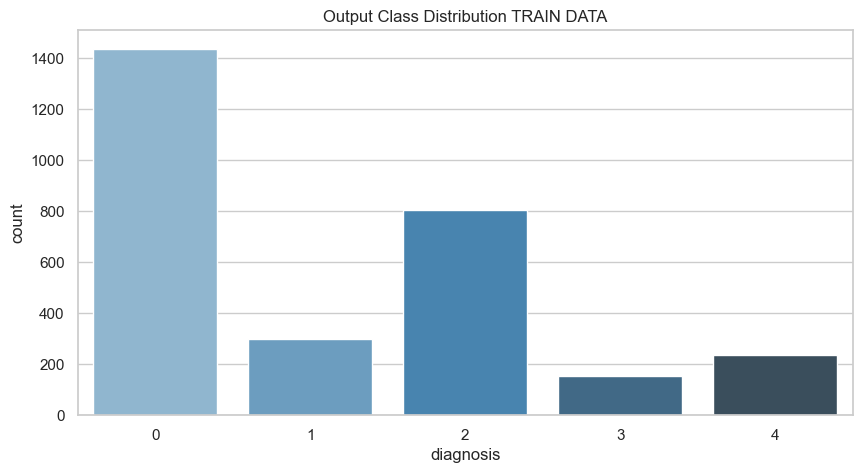

In [108]:
plot_classes(df_train_train,"TRAIN DATA")

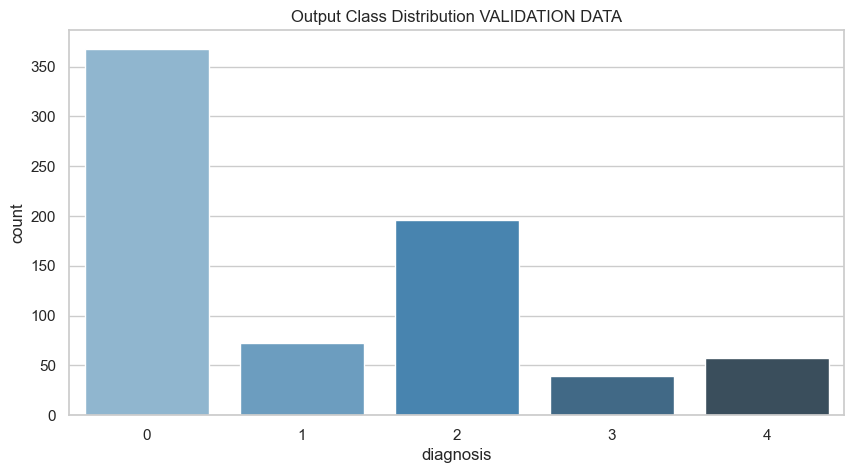

In [109]:
plot_classes(df_train_valid,'VALIDATION DATA')

In [117]:

file = open('df_train_train', 'wb')
pickle.dump(df_train_train, file)
file.close()

file = open('df_train_valid', 'wb')
pickle.dump(df_train_valid, file)
file.close()


In [43]:
file = open('df_train_train', 'rb')
df_train_train = pickle.load(file)
file.close()

file = open('df_train_test', 'rb')
df_train_test = pickle.load(file)
file.close()

In [111]:
print(df_train_train.shape,df_train_valid.shape)
print(len(os.listdir('./train_images_resized_preprocessed')),len(os.listdir('./valid_images_resized_preprocessed')))

(2929, 4) (733, 4)
0 0


#  <a id = 'section7'> <font color='red'>  7. Resize pre-process and Save training data</font> </a>

In [112]:
IMG_SIZE  = 512

In [113]:
import cv2
from multiprocessing.dummy import Pool as ThreadPool

def image_resize_save(file):
    input_filepath = os.path.join('./', 'train_images', f"{file}.png")
    output_filepath = os.path.join('./', 'train_images_resized_preprocessed', f"resized_{file}.png")

    img = cv2.imread(input_filepath)
    
    # Check if the image is loaded successfully
    if img is not None:
        # Resize the image
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        # Save the resized image
        cv2.imwrite(output_filepath, img_resized)
        print(f"Processed image: {file}")
        return True
    else:
        print(f"Error loading image: {file}")
        return False
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

def circle_crop(img, sigmaX = 30):   
    """
    Create circular crop around image centre    
    """    
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 



def multiprocess_image_downloader(process: int, imgs: list):
    """
    Inputs:
        process: (int) number of processes to run
        imgs: (list) list of images
    """
    print(f'MESSAGE: Running {process} processes')
    
    # Use ThreadPool for parallel processing
    pool = ThreadPool(process)
    
    # Map the image_resize_save function to the list of images
    results = pool.map(image_resize_save, imgs)
    
    # Close the pool to free up resources
    pool.close()
    pool.join()
    
    return results


In [114]:
multiprocess_image_downloader(6, list(df_train_train.id_code.values))

MESSAGE: Running 6 processes
Processed image: ea5c42a78979
Processed image: 4bcee3cbe232
Processed image: 33596a635b53
Processed image: 2cacdb0dffae
Processed image: a3475dc3ac80
Processed image: ee36ca728641
Processed image: 175dd560810a
Processed image: 1f543a86c4d4
Processed image: 8e2a3978c244
Processed image: 2399d68d407f
Processed image: 48a45619d1a3
Processed image: 6c6505a0c637
Processed image: 19722bff5a09
Processed image: 4f20f9a9a65b
Processed image: fc8fce67fbf8
Processed image: 97fdee242fea
Processed image: 2fdfb80ea53c
Processed image: 97f290d31813
Processed image: 6b91e99c9408
Processed image: 74eee788edee
Processed image: d6dbb0820ea5
Processed image: d26bb2ed6e71
Processed image: 155e2df6bfcf
Processed image: d29b37d110f3
Processed image: 0cecc2864b7f
Processed image: f3a88d3026dc
Processed image: 4b618537d52f
Processed image: 9c14ce27cbfc
Processed image: 38373431d996
Processed image: 0f495d87656a
Processed image: c64c0966b4cf
Processed image: 5a93c0f783c4
Processed i

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

##### Summary - Using Multiprocessing (6 cores), we managed to resize and save images within 10 minutes, and reducing IMG_SIZE to 512, thereby reducing disk-space from 20 GB (earlier) to 1 GB (after resizing). We shall load data into colab and start training models

#  <a id = 'section8'> <font color='red'>  8. Image Pre Processing and save test data</font> </a>

In [86]:
import cv2
from multiprocessing.dummy import Pool as ThreadPool

def image_resize_save(file):
    input_filepath = os.path.join('./', 'test_images', f"{file}.png")
    output_filepath = os.path.join('./', 'test_images_resized_preprocessed', f"resized_{file}.png")

    img = cv2.imread(input_filepath)
    
    # Check if the image is loaded successfully
    if img is not None:
        # Resize the image
        img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

        # Save the resized image
        cv2.imwrite(output_filepath, img_resized)
        print(f"Processed image: {file}")
        return True
    else:
        print(f"Error loading image: {file}")
        return False
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

def circle_crop(img, sigmaX = 30):   
    """
    Create circular crop around image centre    
    """    
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    return img 



def multiprocess_image_downloader(process: int, imgs: list):
    """
    Inputs:
        process: (int) number of processes to run
        imgs: (list) list of images
    """
    print(f'MESSAGE: Running {process} processes')
    
    # Use ThreadPool for parallel processing
    pool = ThreadPool(process)
    
    # Map the image_resize_save function to the list of images
    results = pool.map(image_resize_save, imgs)
    
    # Close the pool to free up resources
    pool.close()
    pool.join()
    
    return results


In [89]:
# Use 6 cores
multiprocess_image_downloader(6, list(df_train_test.id_code.values))

MESSAGE: Running 6 processes
Error loading image: c12e9ca420a5
Error loading image: cbc23af521f3
Error loading image: 384e6c915722
Error loading image: b5bf7b84fc66
Error loading image: 29580bed2f7d
Error loading image: d29b37d110f3
Error loading image: 49e4b95ee2dc
Error loading image: 21d18b022429
Error loading image: 226c6ceb9185
Error loading image: a11c62cb3f86
Error loading image: d83c3efade75
Error loading image: 70d657f8f503
Error loading image: 85cbb84ac8e0
Error loading image: 63b71347e95d
Error loading image: c5a6f432a1ec
Error loading image: ba4d2c4b3039
Error loading image: be7bc89f5fec
Error loading image: 1782142e17d9
Error loading image: df0886f1e76b
Error loading image: 5b804948e35f
Error loading image: 3730c322d35b
Error loading image: 0232dfea7547
Error loading image: 4eabad7948cf
Error loading image: 838c87c63422
Error loading image: c9c563864ab1
Error loading image: 9d62478042b6
Error loading image: 8acffaf1f4b9
Error loading image: 3ee17aa12e46
Error loading image

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
